<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/DerbyDellaMadonnina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 derbies played:
df = pd.ExcelFile('INTER.xlsx')
derby = pd.read_excel(df, 'Derby della Madonnina')
derby.tail(10)

,Season,Competition,Date,Home team,Score A,Score B,Away team,Referee
229,2021–22,Serie A,2022-02-05,Inter,1,2,Milan,Guida di Torre Annunziata
230,2021–22,Coppa Italia SF,2022-03-01,Milan,0,0,Inter,Mariani di Aprilia
231,2021–22,Coppa Italia SF,2022-04-19,Inter,3,0,Milan,Mariani di Aprilia
232,2022–23,Serie A,2022-09-03,Milan,3,2,Inter,Chiffi di Padova
233,2022–23,Supercoppa Italiana,2023-01-18,Milan,0,3,Inter,Maresca di Napoli
234,2022–23,Serie A,2023-02-05,Inter,1,0,Milan,Massa di Imperia
235,2022–23,UEFA Champions League SF,2023-05-10,Milan,0,2,Inter,Gil Manzano (ESP)
236,2022–23,UEFA Champions League SF,2023-05-16,Inter,1,0,Milan,Turpin (FRA)
237,2023–24,Serie A,2023-09-16,Inter,5,1,Milan,Sozza di Seregno
238,2023–24,Serie A,2024-04-22,Milan,1,2,Inter,Colombo di Como


In [3]:
# Displaying the number of rows and columns in the dataset:
derby.shape

(239, 8)

# **Plotting basic column data**

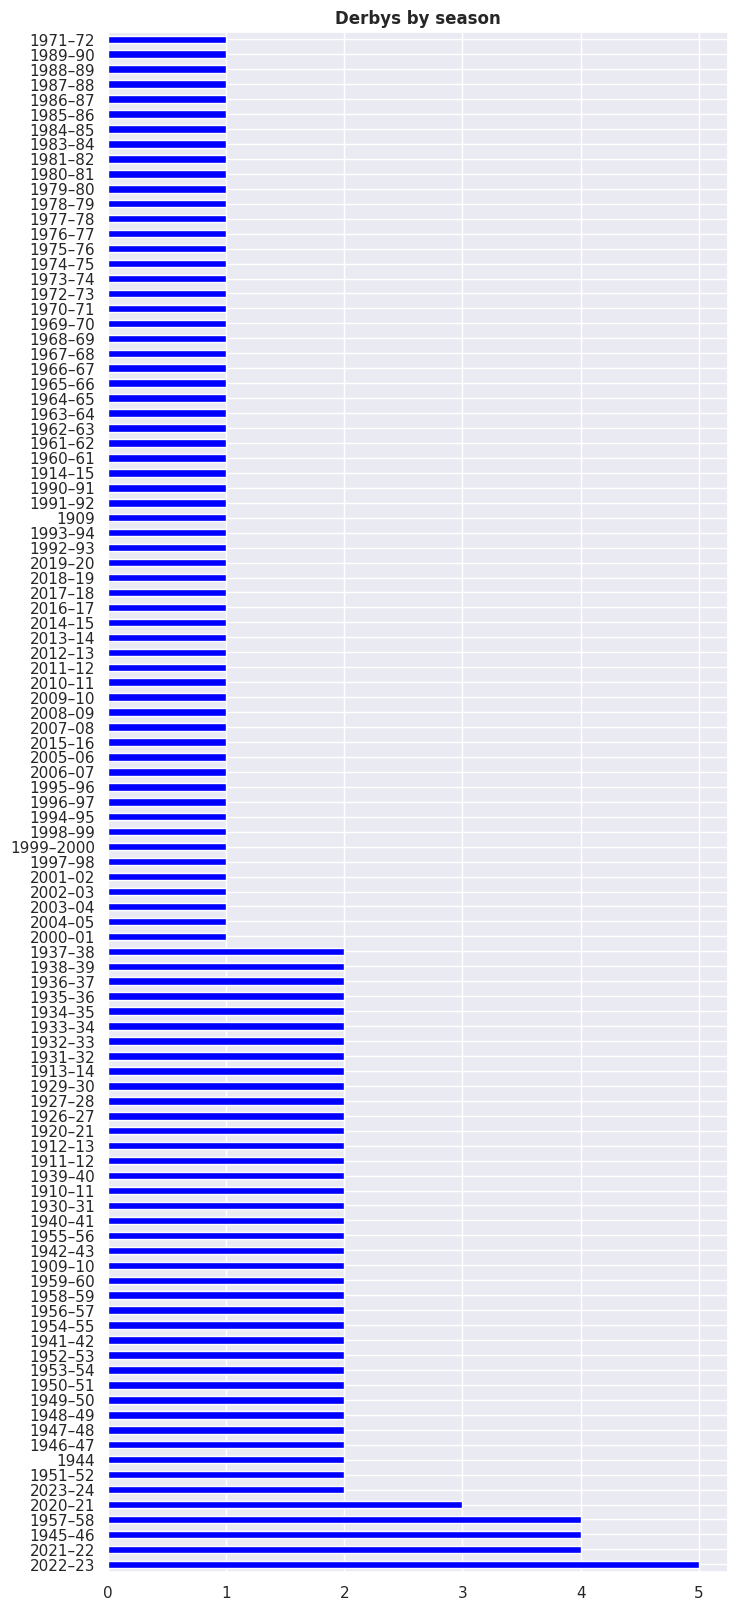

In [4]:
# Displaying derbys by season:
derby['Season'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Derbys by season', fontweight = 'bold')
plt.show()

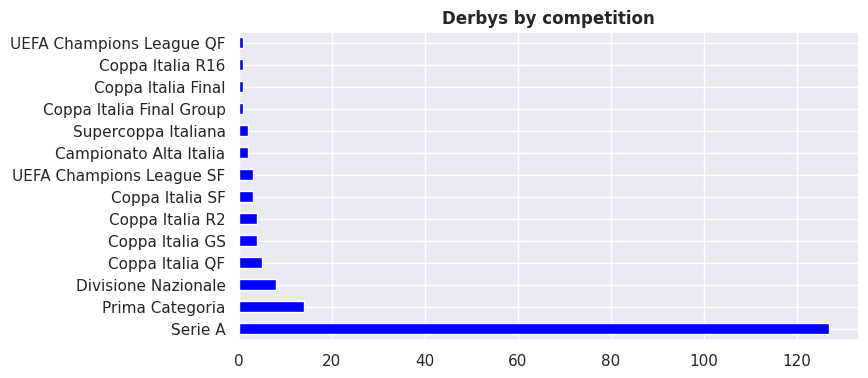

In [5]:
# Displaying derbys by competition:
derby['Competition'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Derbys by competition', fontweight = 'bold')
plt.show()

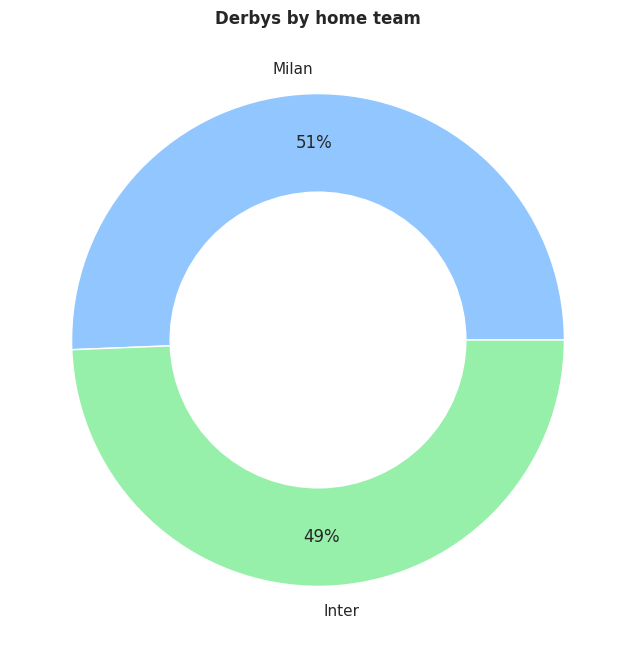

In [6]:
# Displaying derbys by home team:
derby['Home team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by home team', fontweight = 'bold')
plt.show()

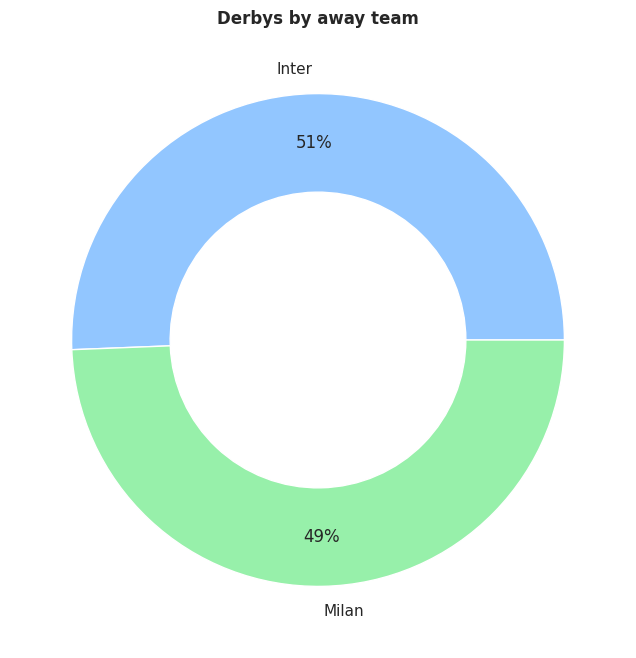

In [7]:
# Displaying derbys by away team:
derby['Away team'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derbys by away team', fontweight = 'bold')
plt.show()

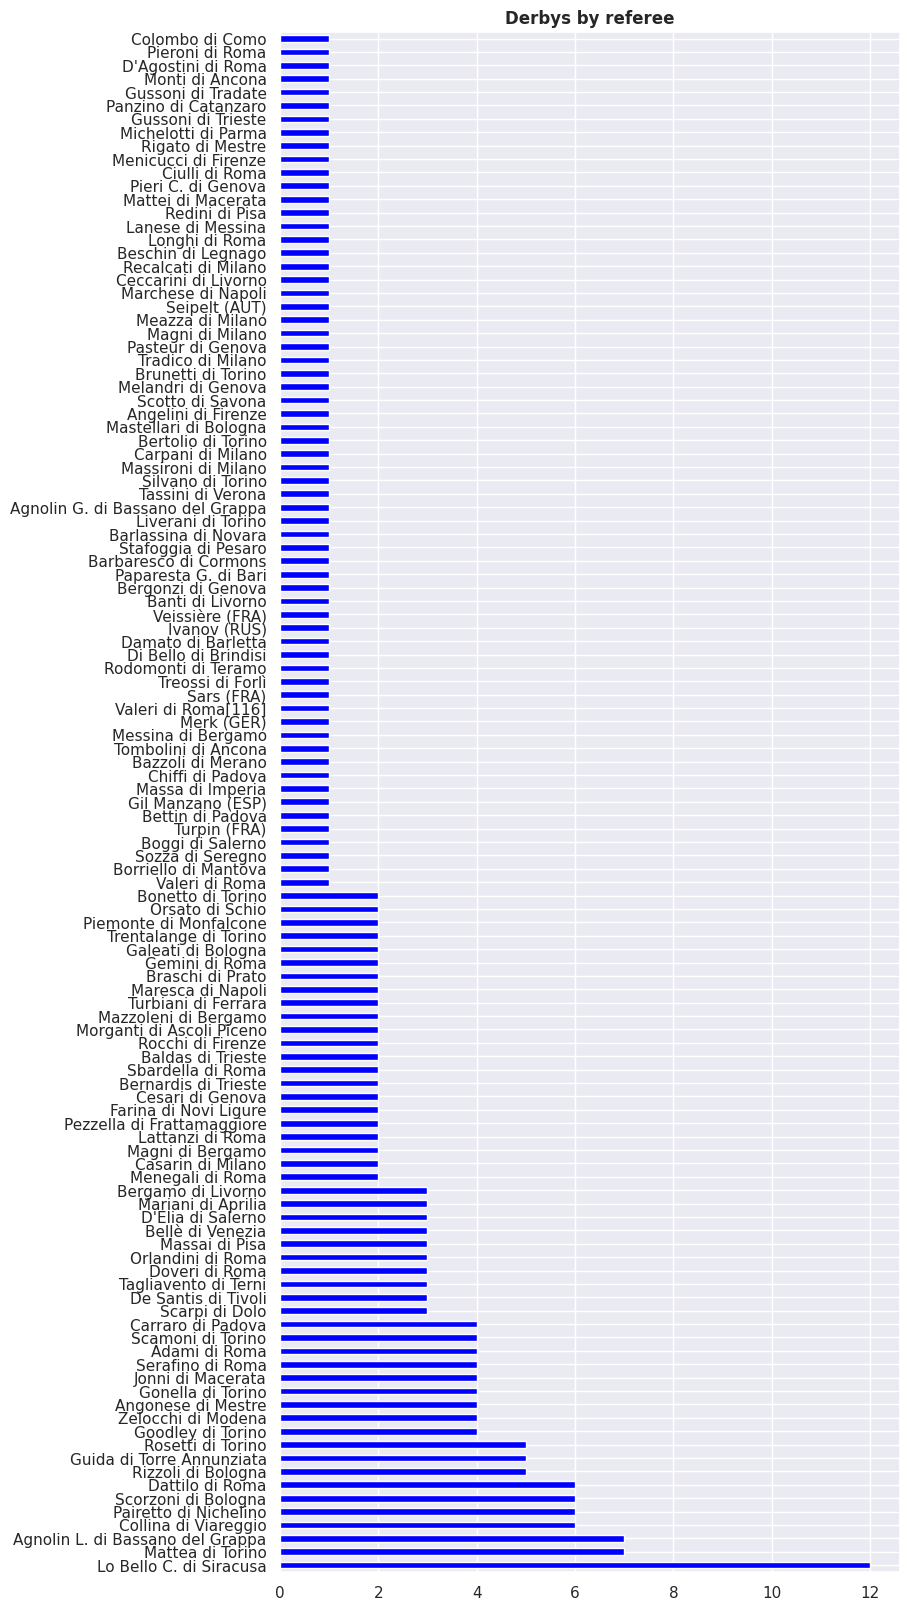

In [8]:
# Displaying derbys by referee:
derby['Referee'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Derbys by referee', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the derby winners:
def who_won(row):
  home_team = row['Home team']
  away_team = row['Away team']
  home_score = row['Score A']
  away_score = row['Score B']

  if home_team == 'Inter' and home_score > away_score or away_team == 'Inter' and away_score > home_score:
      return 'Inter'
  elif home_team == 'Milan' and home_score > away_score or away_team == 'Milan' and away_score > home_score:
      return 'Milan'
  else:
      return 'Draw'

# Applying the function above on a column of the dataset and generating a new column as result:
derby['Who won'] = derby.apply(who_won, axis=1)
derby.head()

,Season,Competition,Date,Home team,Score A,Score B,Away team,Referee,Who won
0,1909,Prima Categoria,1909-01-10,Milan,3,2,Inter,Goodley di Torino,Milan
1,1909–10,Prima Categoria,1910-02-06,Milan,0,5,Inter,Goodley di Torino,Inter
2,1909–10,Prima Categoria,1910-02-27,Inter,5,1,Milan,Recalcati di Milano,Inter
3,1910–11,Prima Categoria,1911-02-05,Inter,0,2,Milan,Meazza di Milano,Milan
4,1910–11,Prima Categoria,1911-04-30,Milan,6,3,Inter,Magni di Milano,Milan


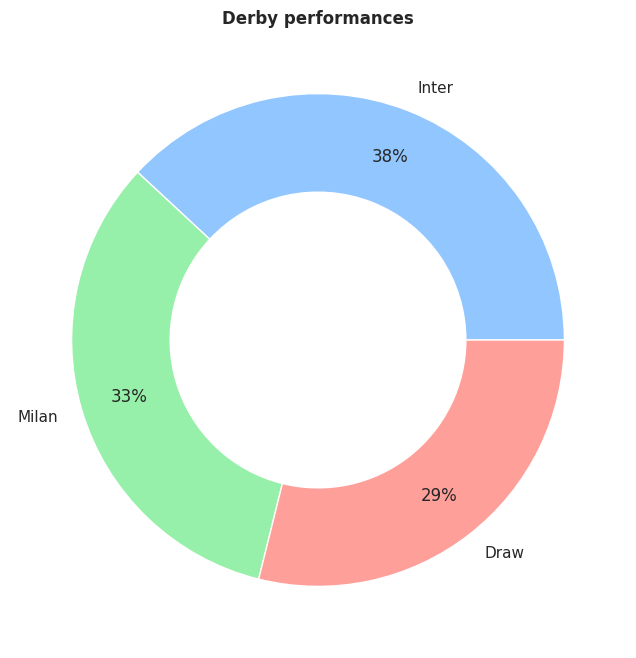

In [19]:
# Displaying who won the derby the most:
derby['Who won'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Derby performances', fontweight = 'bold')
plt.show()